In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [3]:
Bitcoin_A = pd.read_excel("C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/5/bitcoin_A.xlsx")
Bitcoin_A.head()

,DIA,PRECIO,N_TRANS
0,2018-09-18,6296.631667,244259
1,2018-09-19,6335.826667,251037
2,2018-09-20,6418.562667,253674
3,2018-09-21,6669.990833,273051
4,2018-09-22,6709.312500,225537


In [4]:
Bitcoin_A['DIA'] = pd.to_datetime(Bitcoin_A['DIA'], format = '%Y-%m-%d')
print(f'\nRango de fechas: {Bitcoin_A.DIA.min()} / {Bitcoin_A.DIA.max()}')


Rango de fechas: 2018-09-18 00:00:00 / 2019-09-17 00:00:00


In [5]:
# Se establece la columna fecha como índice y se elimina
Bitcoin_A.index = Bitcoin_A['DIA']
del Bitcoin_A['DIA']
print(Bitcoin_A.head())

                 PRECIO  N_TRANS
DIA                             
2018-09-18  6296.631667   244259
2018-09-19  6335.826667   251037
2018-09-20  6418.562667   253674
2018-09-21  6669.990833   273051
2018-09-22  6709.312500   225537


(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

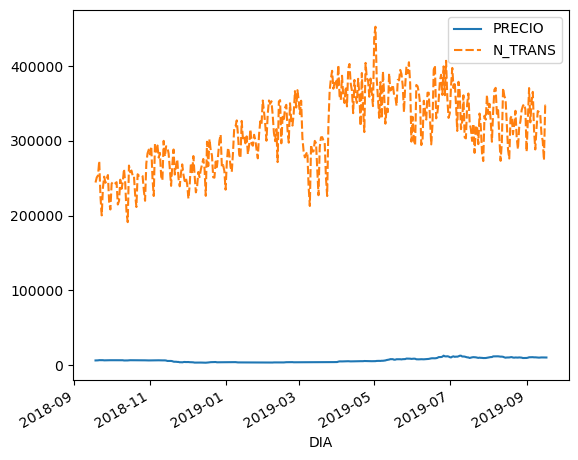

In [6]:
sns.lineplot(Bitcoin_A)
plt.xticks(rotation=30, ha='right')

(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

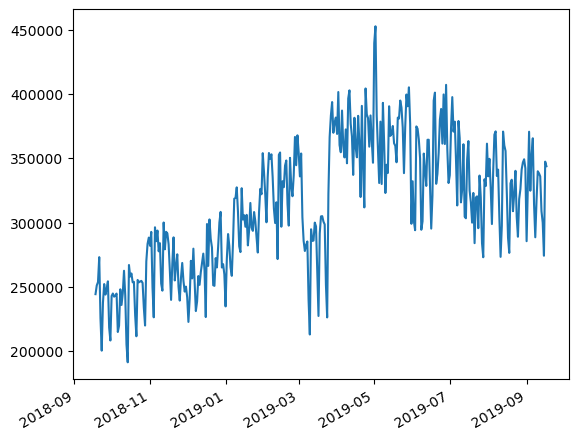

In [7]:
plt.plot(Bitcoin_A["N_TRANS"])
plt.xticks(rotation=30, ha='right')

(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

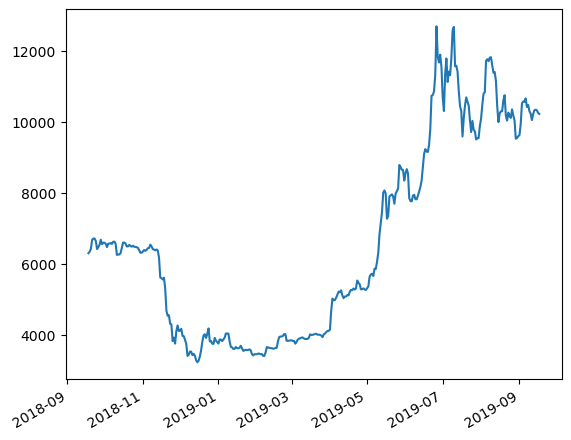

In [8]:
plt.plot(Bitcoin_A["PRECIO"])
plt.xticks(rotation=30, ha='right')

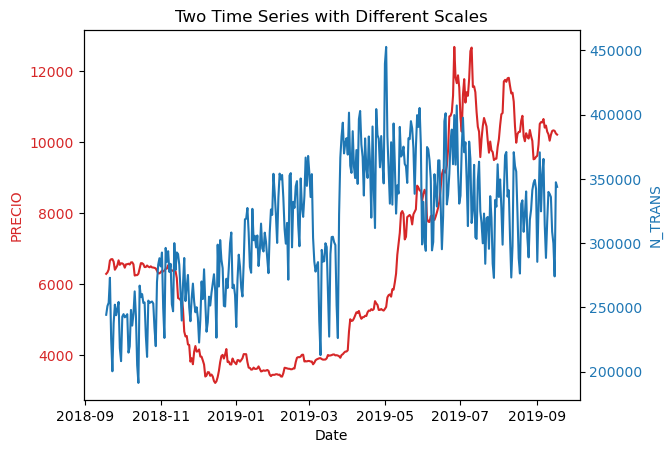

In [9]:
# 1. Crear un gráfico con dos ejes y compartir el eje x
fig, ax1 = plt.subplots()
# 2. Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PRECIO', color=color)
ax1.plot(Bitcoin_A['PRECIO'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
# 3. Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx() # Compartir el eje x
color = 'tab:blue'
ax2.set_ylabel('N_TRANS', color=color)
ax2.plot(Bitcoin_A['N_TRANS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
# 4. Ajustes de diseño
plt.title('Two Time Series with Different Scales')
plt.show()

In [10]:
v_cordoba = pd.read_excel("C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/5/Cordoba.xlsx")
v_cordoba.head()

,,V_Resident,V_Extranj
0,2005M01,27816,9332
1,2005M02,34920,11387
2,2005M03,45221,21663
3,2005M04,41027,29094
4,2005M05,50750,32076


In [11]:
#Se observa que la columna de las fechas no tiene nombre, por lo que:
v_cordoba.columns=['Date','V_Resident','V_Extranj']

In [12]:
v_cordoba['Date']=pd.to_datetime(v_cordoba['Date'],format='%YM%m')
v_cordoba.index=v_cordoba['Date']
del v_cordoba['Date']
print(v_cordoba.head())

            V_Resident  V_Extranj
Date                             
2005-01-01       27816       9332
2005-02-01       34920      11387
2005-03-01       45221      21663
2005-04-01       41027      29094
2005-05-01       50750      32076


Text(0.5, 1.0, 'Viajeros alojados en hoteles en Córdoba')

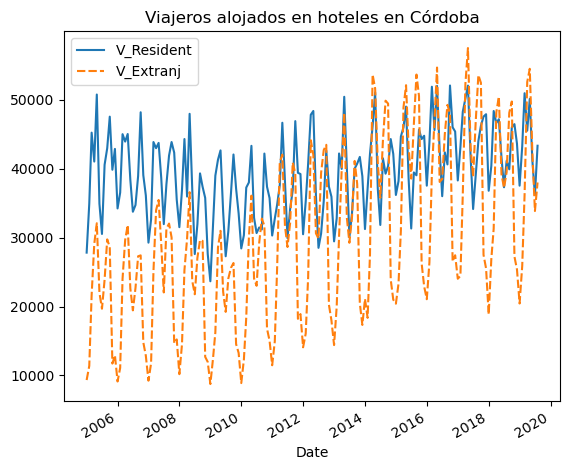

In [13]:
sns.lineplot(v_cordoba)
plt.xticks(rotation=30, ha='right')
# Ajustes de diseño
plt.title('Viajeros alojados en hoteles en Córdoba')

<Axes: xlabel='Date', ylabel='V_Extranj'>

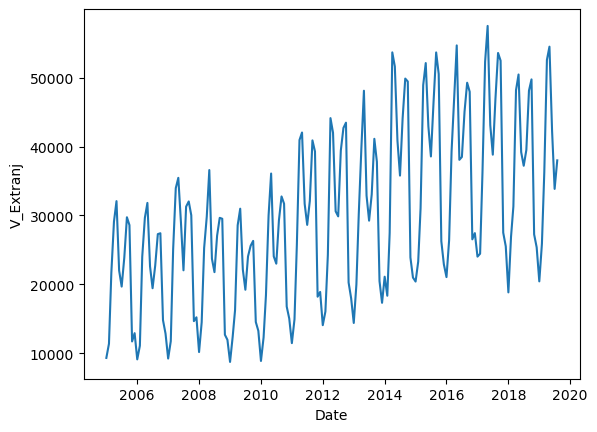

In [14]:
#Nos centramos en la variable “V_Extranj”.
sns.lineplot(v_cordoba['V_Extranj'])

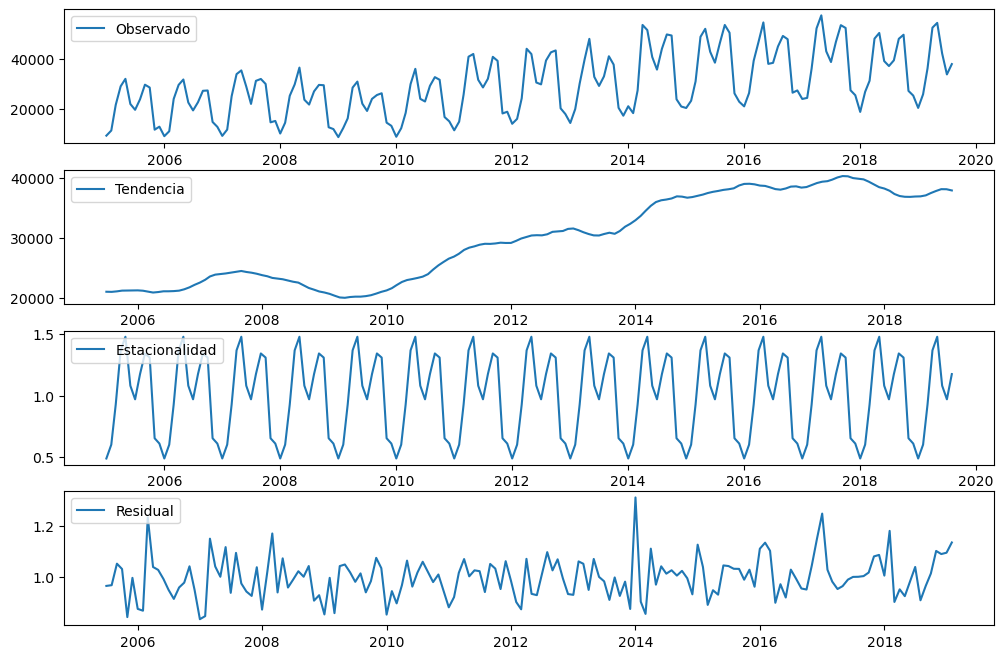

In [15]:
#Descompondremos la serie temporal para conocer su estacionalidad, tendencia y residuos:
from statsmodels.tsa.seasonal import seasonal_decompose
# Realizar la descomposición estacional
result = seasonal_decompose(v_cordoba['V_Extranj'], model='multiplicative')

# Visualizar las componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()

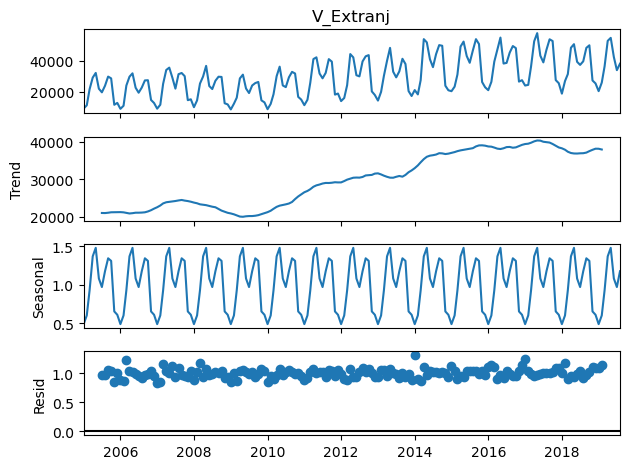

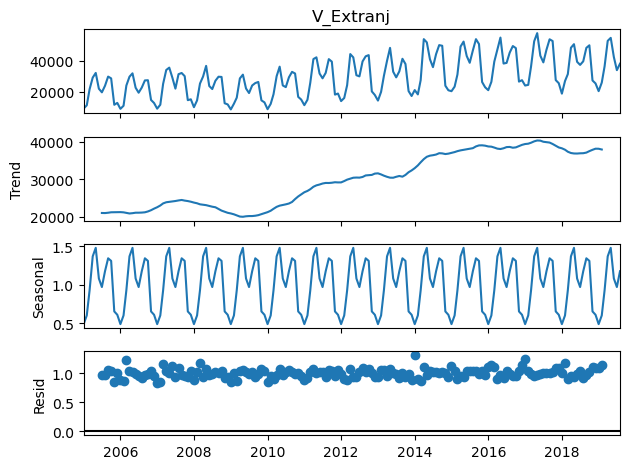

In [16]:
result.plot()

In [17]:
# Accedemos directamente a la tendencia o estacionalidad 
print(result.seasonal)

Date
2005-01-01    0.489635
2005-02-01    0.601963
2005-03-01    0.927655
2005-04-01    1.366617
2005-05-01    1.476760
                ...   
2019-04-01    1.366617
2019-05-01    1.476760
2019-06-01    1.080087
2019-07-01    0.969568
2019-08-01    1.174033
Name: seasonal, Length: 176, dtype: float64


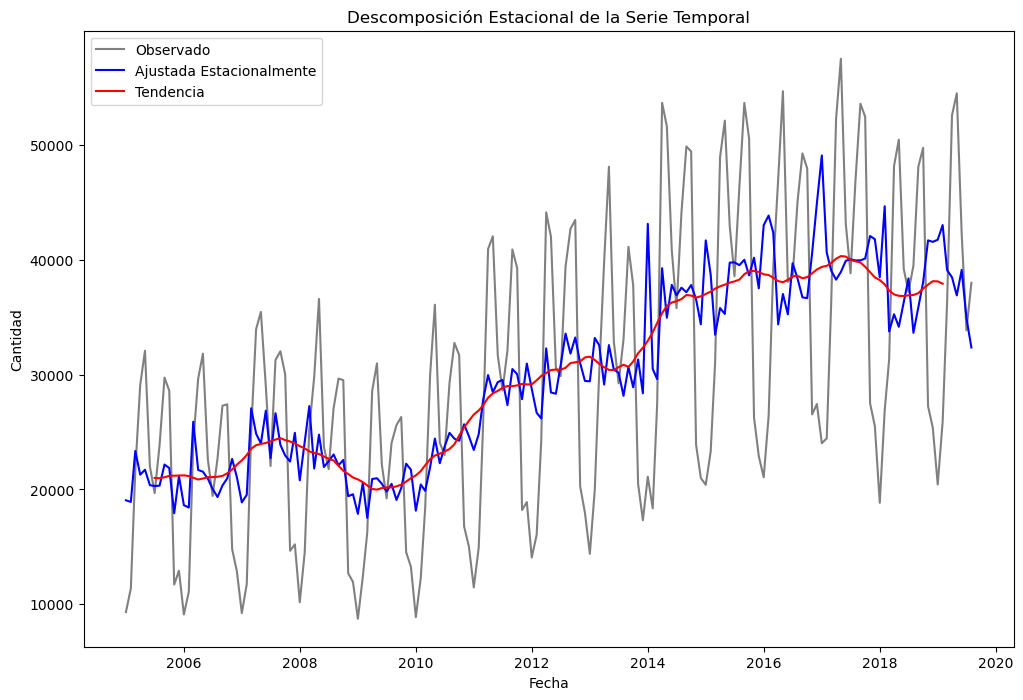

In [18]:
# Crear un gráfico que muestre las componentes
plt.figure(figsize=(12, 8))
plt.plot(result.observed, label='Observado', color='grey')
plt.plot(result.observed/result.seasonal,
label='Ajustada Estacionalmente', color='blue')
plt.plot(result.trend, label='Tendencia', color='red')

# Añadir leyendas y título
plt.legend()
plt.title('Descomposición Estacional de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

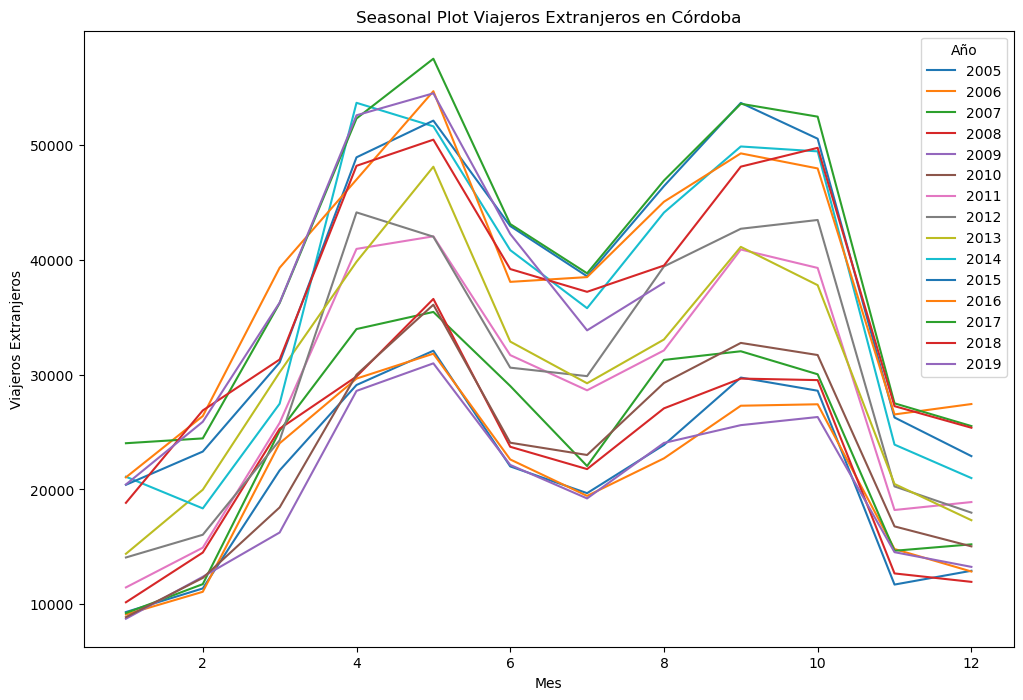

In [19]:
v_cordoba['Año'] = pd.to_datetime(v_cordoba.index, format='%YM%m').year
plt.figure(figsize=(12, 8))
for Año, datos_año in v_cordoba.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año['V_Extranj'], label=str(Año))

# Añadir leyendas y título
plt.legend(title='Año')
plt.title('Seasonal Plot Viajeros Extranjeros en Córdoba')
plt.xlabel('Mes')
plt.ylabel('Viajeros Extranjeros')

# Mostrar el gráfico
plt.show()

In [26]:
# MODELO DE ALISADO SIMPLE

import statsmodels.api as sm
precio_R = Bitcoin_A.PRECIO.loc['2019-08-01':]
precio_R.index.freq = 'D'
# Aplicar suavizado exponencial simple.
modelo_ses = sm.tsa.SimpleExpSmoothing(precio_R , initialization_method="estimated").fit()
# Para seleccionar distintas alphas, fit(smoothing_level=alpha)
# Calcular la predicción para 7 días.
precio_s1 = modelo_ses.forecast(steps=7)
# Para ver parámetros, e.g.: alpha = 0.995
modelo_ses.summary()

Dep. Variable:,PRECIO,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3535075.280
Optimized:,True,AIC,541.938
Trend:,None,BIC,545.681
Seasonal:,None,AICC,542.868
Seasonal Periods:,None,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,09:42:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,10237.184,l.0,True


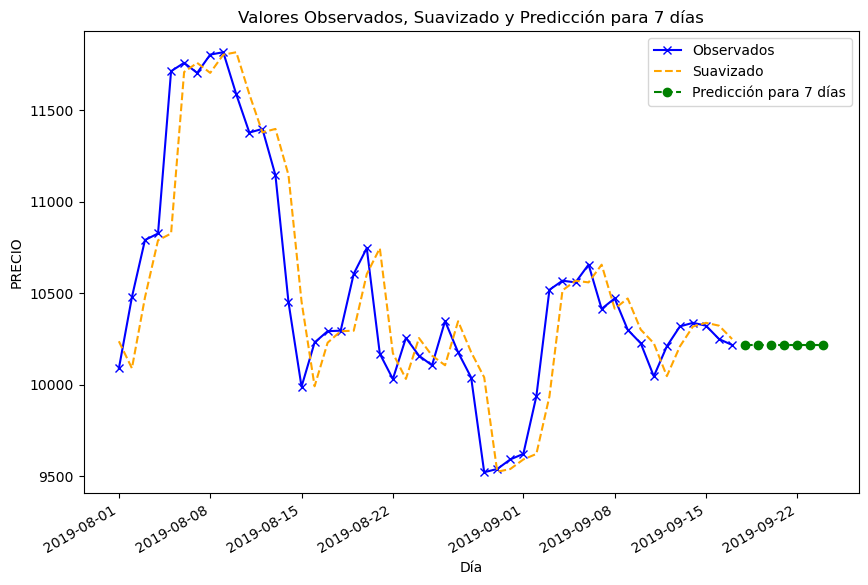

In [27]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# Valores observados
plt.plot(precio_R.index, precio_R, label='Observados', marker='x', linestyle='-', color='blue')
# Valores suavizados (fitted)
plt.plot(precio_R.index, modelo_ses.fittedvalues, label='Suavizado', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(precio_s1.index, precio_s1, label='Predicción para 7 días', linestyle='--', marker='o', color='green')
plt.xlabel('Día')
plt.ylabel('PRECIO')
plt.title('Valores Observados, Suavizado y Predicción para 7 días')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

In [22]:
# MODELO DE ALISADO DOBLE

# Aplicar suavizado exponencial doble (Holt).
modelo_holt = sm.tsa.ExponentialSmoothing(precio_R, trend='add', damped=False).fit(
    smoothing_level=0.8, smoothing_slope=0.3, optimized=False)
# Para seleccionar distintas alphas y betas, fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
# Obtener predicciones para 7 días
predicciones = modelo_holt.forecast(steps=7)
# Mostrar la descripción del modelo
modelo_holt.summary()

C:\Users\lrodr\AppData\Local\Temp\ipykernel_25864\699484943.py:4: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(precio_R, trend='add', damped=False).fit(
C:\Users\lrodr\AppData\Local\Temp\ipykernel_25864\699484943.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(precio_R, trend='add', damped=False).fit(


Dep. Variable:,PRECIO,No. Observations:,48
Model:,ExponentialSmoothing,SSE,4260675.640
Optimized:,False,AIC,554.899
Trend:,Additive,BIC,562.384
Seasonal:,None,AICC,556.948
Seasonal Periods:,None,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,09:32:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.3000000,beta,False


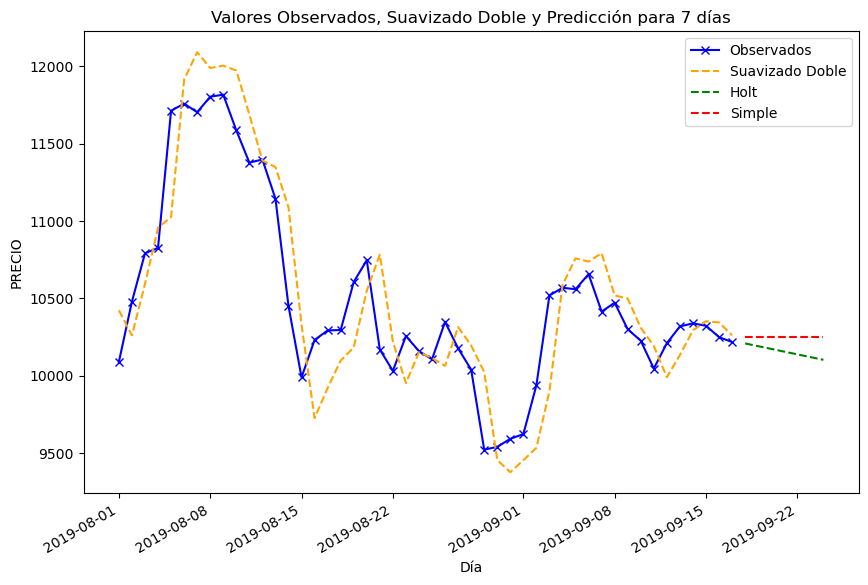

In [23]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# Valores observados
plt.plot(precio_R.index, precio_R, label='Observados', marker='x', linestyle='-', color='blue')
# Valores suavizados (fitted)
plt.plot(precio_R.index, modelo_holt.fittedvalues, label='Suavizado Doble', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(predicciones.index, predicciones, label='Holt', linestyle='--',color='green')
plt.plot(precio_s1.index, precio_s1, label='Simple', linestyle='--', color='red')
plt.xlabel('Día')
plt.ylabel('PRECIO')
plt.title('Valores Observados, Suavizado Doble y Predicción para 7 días')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

In [24]:
# MODELO DE ALISADO HOLT-WINTERS

modelo_holt_winters = sm.tsa.ExponentialSmoothing(v_cordoba['V_Extranj'], trend='add', seasonal='multiplicative', seasonal_periods=12).fit()
# Obtener predicciones para 1 año
predicciones_hw = modelo_holt_winters.forecast(steps=12)
# Mostrar la descripción del modelo
modelo_holt_winters.summary()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,V_Extranj,No. Observations:,176
Model:,ExponentialSmoothing,SSE,1235445343.678
Optimized:,True,AIC,2806.502
Trend:,Additive,BIC,2857.229
Seasonal:,Multiplicative,AICC,2810.858
Seasonal Periods:,12,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,09:32:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2525000,alpha,True
smoothing_trend,0.0001,beta,True


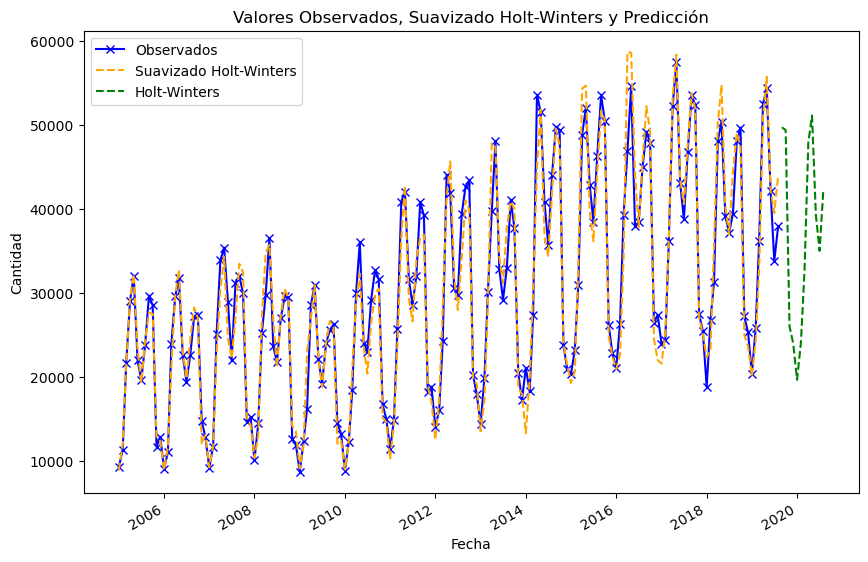

In [25]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
plt.plot(v_cordoba.index, v_cordoba['V_Extranj'], label='Observados', marker='x', linestyle='-', color='blue')
plt.plot(v_cordoba.index, modelo_holt_winters.fittedvalues, label='Suavizado Holt-Winters', linestyle='--', color='orange')
plt.plot(predicciones_hw.index, predicciones_hw, label='Holt-Winters', linestyle='--',color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Suavizado Holt-Winters y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()